In [5]:
import pandas as pd
import matplotlib.pyplot as plt
# Load the sales data
sales_data = pd.read_csv(r"c:\Users\bhara\Documents\Main flow internship\Task 2\sales_data.csv")

# Display the first few rows and info to understand the structure
sales_data.head(), sales_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 113036 entries, 0 to 113035
Data columns (total 18 columns):
 #   Column            Non-Null Count   Dtype 
---  ------            --------------   ----- 
 0   Date              113036 non-null  object
 1   Day               113036 non-null  int64 
 2   Month             113036 non-null  object
 3   Year              113036 non-null  int64 
 4   Customer_Age      113036 non-null  int64 
 5   Age_Group         113036 non-null  object
 6   Customer_Gender   113036 non-null  object
 7   Country           113036 non-null  object
 8   State             113036 non-null  object
 9   Product_Category  113036 non-null  object
 10  Sub_Category      113036 non-null  object
 11  Product           113036 non-null  object
 12  Order_Quantity    113036 non-null  int64 
 13  Unit_Cost         113036 non-null  int64 
 14  Unit_Price        113036 non-null  int64 
 15  Profit            113036 non-null  int64 
 16  Cost              113036 non-null  int

(         Date  Day     Month  Year  Customer_Age       Age_Group  \
 0  2013-11-26   26  November  2013            19     Youth (<25)   
 1  2015-11-26   26  November  2015            19     Youth (<25)   
 2  2014-03-23   23     March  2014            49  Adults (35-64)   
 3  2016-03-23   23     March  2016            49  Adults (35-64)   
 4  2014-05-15   15       May  2014            47  Adults (35-64)   
 
   Customer_Gender    Country             State Product_Category Sub_Category  \
 0               M     Canada  British Columbia      Accessories   Bike Racks   
 1               M     Canada  British Columbia      Accessories   Bike Racks   
 2               M  Australia   New South Wales      Accessories   Bike Racks   
 3               M  Australia   New South Wales      Accessories   Bike Racks   
 4               F  Australia   New South Wales      Accessories   Bike Racks   
 
                Product  Order_Quantity  Unit_Cost  Unit_Price  Profit  Cost  \
 0  Hitch Rack -

In [2]:
# Convert 'Date' to datetime
sales_data['Date'] = pd.to_datetime(sales_data['Date'])

# Aggregate revenue by date
daily_sales = sales_data.groupby('Date')['Revenue'].sum().reset_index()

# Set the date as index for time series analysis
daily_sales.set_index('Date', inplace=True)

# Display the first few rows of the aggregated data
daily_sales.head()


,Revenue
Date,
2011-01-01,12821
2011-01-02,11868
2011-01-03,31175
2011-01-04,18909
2011-01-05,4675


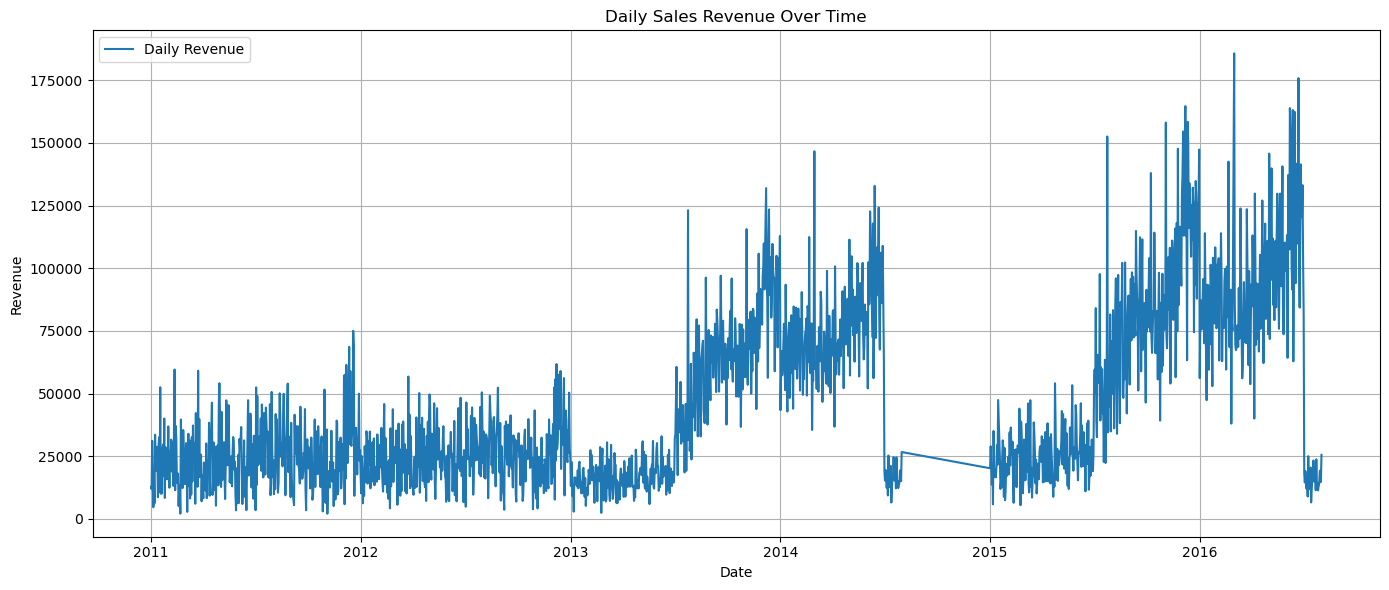

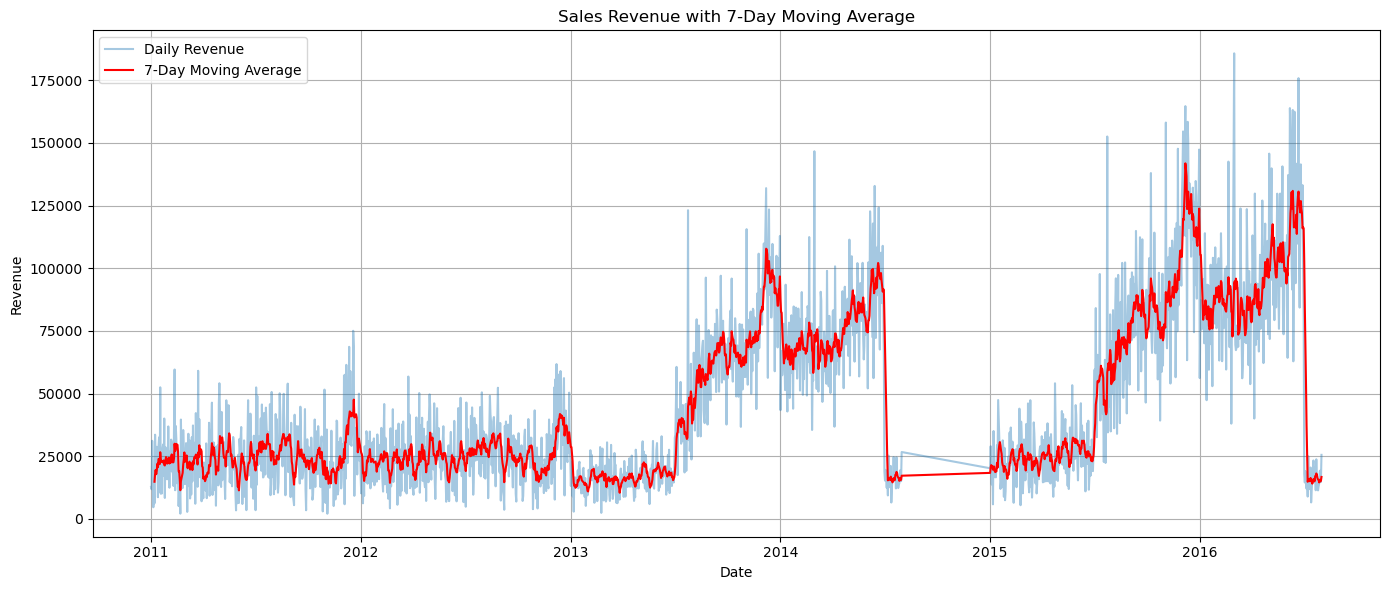

In [4]:
# Plot daily revenue
plt.figure(figsize=(14, 6))
plt.plot(daily_sales.index, daily_sales['Revenue'], label='Daily Revenue')
plt.title('Daily Sales Revenue Over Time')
plt.xlabel('Date')
plt.ylabel('Revenue')
plt.legend()
plt.grid(True)
plt.tight_layout()
plt.show()

# Plot 7-day moving average
plt.figure(figsize=(14, 6))
daily_sales['7-Day MA'] = daily_sales['Revenue'].rolling(window=7).mean()
plt.plot(daily_sales.index, daily_sales['Revenue'], alpha=0.4, label='Daily Revenue')
plt.plot(daily_sales.index, daily_sales['7-Day MA'], color='red', label='7-Day Moving Average')
plt.title('Sales Revenue with 7-Day Moving Average')
plt.xlabel('Date')
plt.ylabel('Revenue')
plt.legend()
plt.grid(True)
plt.tight_layout()
plt.show()
